In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import functions

# Import Data

In [2]:
df_a1 = pd.read_csv('data/csv/dgat/a1_pmol.csv')
df_a1.head()

,Unnamed: 0,feature,class,86,94,110,112,117,Control,73,...,248,249,255,257,Lrig1-D3,Lrig-D3 vs. CON,Lrig-D3 vs. CON.1,ALI,Lipid,Unnamed: 35
0,NaN,fullname,NaN,VilERT-G519R-86,VilERT-G519R-94,VilERT-G519R-110,VilERT-G519R-112,VilERT-G519R-117,NaN,VilERT-M5B-73,...,Lrig1-M5B-248,Lrig1-M5B-249,Lrig1-M5B-255,Lrig1-M5B-257,NaN,NaN,NaN,H655ALI,H655Lipid,H655
1,No.,cohort,NaN,Control,Control,Control,Control,Control,Average,iKO,...,Lrig1-D3,Lrig1-D3,Lrig1-D3,Lrig1-D3,Average,"Fold change (log, base 2)",P-value,DGAT-ALI,DGAT-Lipid,"Fold change (log, base 2)"
2,1,CE 13:0;0,CE,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2,CE 16:0;0,CE,55.57350159,30.77109909,18.34740067,10.03540039,19.29459953,26.80440025,70.8144989,...,19.11630058,15.30920029,37.17850113,12.49040031,21.02360058,-0.4,0.59,5.813129902,4.17456007,-0.5
4,3,CE 16:1;0,CE,7.007959843,4.1386199,2.512140036,NaN,NaN,4.552906593,8.897470474,...,2.650619984,NaN,3.167690039,2.376519918,2.73160998,-0.7,0.24,3.237790108,2.206110001,-0.6


In [3]:
header = pd.read_csv('data/csv/dgat/a1_header.csv')
header.head()

,shortname,63,73,76,80,83,86,89,93,94,...,116,117,195,196,248,249,255,257,ALI,Lipid
0,fullname,VilERT-G519R-63,VilERT-M5B-73,VilERT-M5B-76,VilERT-G519R-80,VilERT-G519R-83,VilERT-G519R-86,VilERT-G519R-89,VilERT-G519R-93,VilERT-G519R-94,...,VilERT-G519R-116,VilERT-G519R-117,Lrig-M5B-195,Lrig-M5B-196,Lrig1-M5B-248,Lrig1-M5B-249,Lrig1-M5B-255,Lrig1-M5B-257,H655ALI,H655Lipid
1,cohort,G519R,iKO,iKO,G519R,G519R,Control,iKO,iKO,Control,...,G519R,Control,iKO,iKO,Lrig1-D3,Lrig1-D3,Lrig1-D3,Lrig1-D3,DGAT-ALI,DGAT-Lipid


## Format Table

In [4]:
# set index
num_idx = 3
idx_col = 'feature'
df_a1.set_index(idx_col, inplace=True) 
df_a1.index.name = 'Sample Name'

# set columns
col_lvls = 3
main_lvl = 3
c = main_lvl - 2
hT = header.T
df_a1.drop(columns = df_a1.columns[~df_a1.columns.isin(hT.index)], inplace=True) # drop columns not in header
df_a1.drop(columns = ['ALI', 'Lipid'], inplace=True)
if c >= 0:
    df_a1.rename(columns=hT[c], inplace=True) # rename columns if not using existing
df_a1.columns.name = 'Mutation'
df_a1 = df_a1[(col_lvls - 1):] # remove column rows

df_a1.fillna(0, inplace=True) # fill empty cells
df_a1 = df_a1.astype(float)

df_a1.head()

Mutation,Control,Control,Control,Control,Control,iKO,iKO,iKO,iKO,iKO,iKO,G519R,G519R,G519R,G519R,G519R,Lrig1-D3,Lrig1-D3,Lrig1-D3,Lrig1-D3
Sample Name,,,,,,,,,,,,,,,,,,,,
CE 13:0;0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,4.51979,0.000000,0.00000,0.000000,0.00000
CE 16:0;0,55.573502,30.771099,18.347401,10.03540,19.29460,70.814499,51.501999,21.721001,8.54701,47.35210,51.85490,8.48712,0.0,0.0,0.0,4.31072,19.116301,15.30920,37.178501,12.49040
CE 16:1;0,7.007960,4.138620,2.512140,0.00000,0.00000,8.897470,6.908720,0.000000,0.00000,5.78307,6.35915,0.00000,0.0,0.0,0.0,0.00000,2.650620,0.00000,3.167690,2.37652
CE 17:0;0,0.000000,3.202250,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.00000
CE 18:0;0,18.328100,12.432500,5.665630,3.73696,8.91961,29.006001,22.171801,11.610400,3.76089,18.20270,26.04970,4.56777,0.0,0.0,0.0,5.16762,6.763340,6.52825,11.210000,5.82158


## Generate Lipid Metadata

### General Lipid Data

In [5]:
import re

df = df_a1.reset_index()
row_list = []

for name in df["Sample Name"]:
    # print(name)
    
    # split sample name string
    qual = re.split(' |:|;', name)
    # print(qual)
    
    # get head group, chain length, unsaturation
    head_group = qual[0]
    
    # get chain length
    chain_length = qual[1]
    if "-" in chain_length:
        c = chain_length.split(sep="-")
        chain_length = c[1]
        head_group += " " + c[0]
    chain_length = int(chain_length)
    
    # get unsaturation
    unsaturation = qual[2]
    if "+" in unsaturation:
        u = unsaturation.split(sep="+")
        unsaturation = u[0] 
    unsaturation = int(unsaturation)
    
    # create dict for row and then add to list of rows if not already in there
    row = {"Sample Name":name, 
           "Head Group":head_group, 
           "Acyl Chain Length":chain_length, 
           "Unsaturation":unsaturation}
    if row not in row_list:
        row_list.append(row)
    
    
df_meta = pd.DataFrame(row_list)
df_meta.sample(10)
# df_meta[df_meta["Sample Name"] == "DAG 29:3+NH4 (-FA 12:1 (NH4))"]

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
780,PE O-16:0;0/18:2;0,PE O,16,0
674,PE 17:1;0_20:1;0,PE,17,1
1061,PI 16:1;0_19:1;0,PI,16,1
1391,TAG 58:1;0,TAG,58,1
968,PG 16:1;0_22:3;0,PG,16,1
460,PC 18:1;0_19:1;0,PC,18,1
1076,PI 17:0;0_20:5;0,PI,17,0
1164,HexCer 38:1;3,HexCer,38,1
902,PE O-18:1;0/20:4;0,PE O,18,1
1367,TAG 55:4;0,TAG,55,4


### Head Group Metadata

In [6]:
# list of original head groups
hg_list = df_meta['Head Group'].unique()

# list of head groups metadata
hg2_list = []

for hg in hg_list:
    # first sort the O groups (ex: PC, PC O)
    if " " in hg:
        hg2 = hg.split(" ")[0] 
        
    # sort the 1/2/3 groups(GD, GT)
    elif hg[-1] in ['1', '2', '3']:
        hg2 = hg[:-1]
    
    # get the hexcer
    elif 'Hex' in hg:
        hg2 = 'Hex_Cer'
        
    # get the acylglycerols
    elif hg in 'DAG,TAG,MAG':
        hg2='DAG,TAG,MAG'
    
    # all others    
    else:
        hg2 = hg
        
    hg2_list.append(hg2)
    
df_hg = pd.DataFrame({'Head Group': hg_list, 'Head Group 2': hg2_list})
df_hg.sort_values('Head Group').head(5)

,Head Group,Head Group 2
0,CE,CE
1,CL,CL
2,Cer,Cer
3,DAG,"DAG,TAG,MAG"
4,HexCer,Hex_Cer


### Unsaturation Metadata

In [7]:
# merge df_meta with df_hg
df_meta2 = df_meta.merge(df_hg, on='Head Group')

# add unsaturation metadata
df_meta2['Unsaturation 2'] = np.where(df_meta2['Unsaturation'] < 3, df_meta2['Unsaturation'], '>=3')
df_meta2.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2,Unsaturation 2
624,PG 18:0;0_20:1;0,PG,18,0,PG,0
1053,PE O-16:1;0/16:0;0,PE O,16,1,PE,1
1127,PE O-18:0;0/24:1;0,PE O,18,0,PE,0


# PCA

## Standardize Data (Across Row)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df_standardized = df_a1.T
exps = df_standardized.index

x = df_standardized.values
print(x.shape)
x = StandardScaler().fit_transform(x)

# check random column for standardization (mean=0, standard deviation=1)
x.shape, np.mean(x[:,20]), np.std(x[:,20])

(20, 1421)


((20, 1421), -8.881784197001253e-17, 1.0)

## PCA - DataFrame

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca_lipids = PCA(n_components=3)
pca=pca_lipids.fit_transform(x)

In [12]:
# create dataframe with principal components
df_pca = pd.DataFrame(pca)
pcs = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
df_pca.columns=pcs
df_pca['Mutation'] = exps
df_pca

,Principal Component 1,Principal Component 2,Principal Component 3,Mutation
0,6.237980,-22.347578,23.821189,Control
1,-18.504706,-0.926432,5.380775,Control
2,-22.889249,-0.251213,0.757686,Control
3,-15.726237,-8.726547,7.548977,Control
4,-0.046217,-22.002610,18.273331,Control
5,36.119306,-9.800340,-18.392516,iKO
6,45.112736,-31.020935,-10.779421,iKO
7,50.102368,35.928075,18.470254,iKO
8,-5.395201,4.211126,-3.650296,iKO
9,2.899813,1.544444,-18.813324,iKO


## Explained Variance

In [13]:
ev = pca_lipids.explained_variance_ratio_
print('Explained variance per principal component:')
print('PC 1: {}\nPC 2: {}\nPC 3: {}'.format(ev[0],ev[1],ev[2]))

Explained variance per principal component:
PC 1: 0.3691636276972315
PC 2: 0.14813498356423996
PC 3: 0.10208432828021913


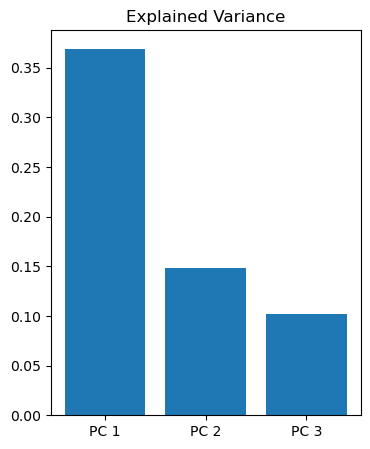

In [14]:
plt.figure(figsize=(4,5))
plt.bar(
    x=['PC 1', 'PC 2', 'PC 3'],
    height=ev
)
plt.title('Explained Variance')
plt.savefig('graphs/dgat/pca/ExplainedVarianceGraph.png', dpi=300, bbox_inches='tight')

## PCA - Graph

In [15]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

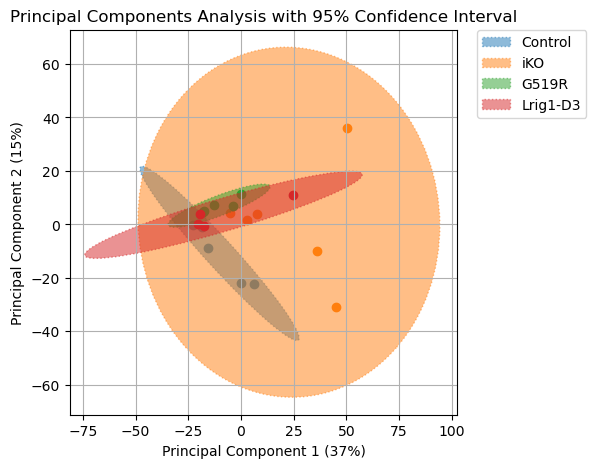

In [16]:
i = 0
fig, ax_nstd = plt.subplots(figsize=(5,5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['Principal Component 1']
    y = df_pca[df_pca['Mutation'] == protein]['Principal Component 2']
    
    ax_nstd.scatter(x, y, color=colors[i])
    confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax_nstd.set_title('Principal Components Analysis with 95% Confidence Interval')
ax_nstd.set_xlabel('Principal Component 1 ({:.0%})'.format(ev[0]))
ax_nstd.set_ylabel('Principal Component 2 ({:.0%})'.format(ev[1]))
plt.show()
ax_nstd.figure.savefig('graphs/dgat/pca/PCA.png', dpi=300, bbox_inches='tight')

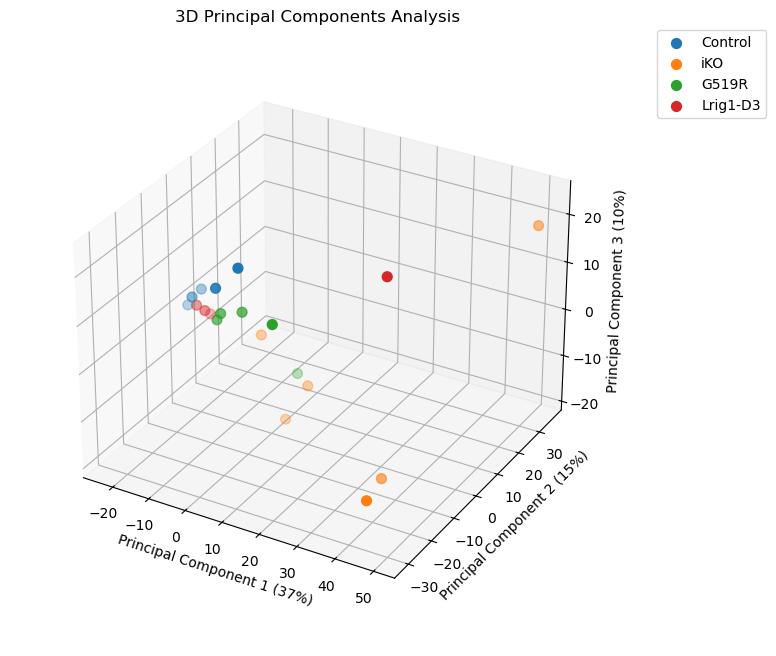

In [17]:
i = 0
fig = plt.figure(figsize=(8,8))
ax_nstd = fig.add_subplot(projection='3d')
ax_nstd.set_box_aspect(aspect=None, zoom=0.9)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['Principal Component 1']
    y = df_pca[df_pca['Mutation'] == protein]['Principal Component 2']
    z = df_pca[df_pca['Mutation'] == protein]['Principal Component 3']
    
    ax_nstd.scatter(x, y, z, color=colors[i], label=protein, s=50)
#     confidence_ellipse(x, y, ax_nstd, n_std=3,
#                    label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax_nstd.set_title('3D Principal Components Analysis')
ax_nstd.set_xlabel('Principal Component 1 ({:.0%})'.format(ev[0]))
ax_nstd.set_ylabel('Principal Component 2 ({:.0%})'.format(ev[1]))
ax_nstd.set_zlabel('Principal Component 3 ({:.0%})'.format(ev[2]))
plt.show()
ax_nstd.figure.savefig('graphs/dgat/pca/3D_PCA.png', dpi=300, bbox_inches='tight')

# Head Group Analysis

## Donut Charts

### All Head Groups

In [18]:
h = functions.norm_long(df_meta2, df_a1, var='Head Group 2', renamed_var='Head Group', norm_var=False)
#h.head()

In [19]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group'})

for ptn in h['Mutation'].unique():
    source = h[h['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(Fraction):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Fraction)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn}
    )
    
    chart_list.append(donut)

d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:]) & heads
d = d.properties(title=alt.Title('Average Percentage of Head Group'))
d.save('graphs/dgat/head_group/Donut_Charts_AllHG.png', ppi=300)
d

alt.VConcatChart(...)

### No PE/PC/SM/PS

In [20]:
h_dropped = functions.norm_long(df_meta2, df_a1, var='Head Group 2', renamed_var='Head Group', drop_var=['PC', 'PE', 'PS', 'SM'], norm_var=False)

In [21]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h_dropped).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group'})

for ptn in h_dropped['Mutation'].unique():
    source = h_dropped[h_dropped['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(Fraction):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Fraction)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn}
    )
    
    chart_list.append(donut)

d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:]) & heads
d = d.properties(title={'text':['Average Percentage of Head Group'],  'subtitle':['PE/PC/PS/SM removed']})
d.save('graphs/dgat/head_group/Donut_Charts_NoPEPCPSSM.png', ppi=300)
d

alt.VConcatChart(...)

## Heatmap

In [22]:
hm = alt.Chart(h).mark_rect(stroke='white').encode(
    x='Mutation:N',
    y=alt.Y('Head Group:N', sort=alt.EncodingSortField(field='Fraction', order='descending')),
    color='mean(Fraction):Q',
    tooltip=['Mutation', 'Head Group', 'mean(Fraction)']
).properties(
    title = "Head Group Distribution",
    width=500,
    height=500
)
hm.save('graphs/dgat/head_group/Heatmap_AllHG.png', ppi=300)
hm

alt.Chart(...)

In [23]:
hm = alt.Chart(h_dropped).mark_rect(stroke='white').encode(
    x='Mutation:N',
    y=alt.Y('Head Group:N', sort=alt.EncodingSortField(field='Fraction', order='descending')),
    color='mean(Fraction):Q',
    tooltip=['Mutation', 'Head Group', 'mean(Fraction)']
).properties(
    title = {'text': "Head Group Distribution", "subtitle":"PE/PC/PS/SM removed"},
    width=500,
    height=500
)
hm.save('graphs/dgat/head_group/Heatmap_NoPEPCPSSM.png', ppi=300)
hm

alt.Chart(...)

## Z-Score

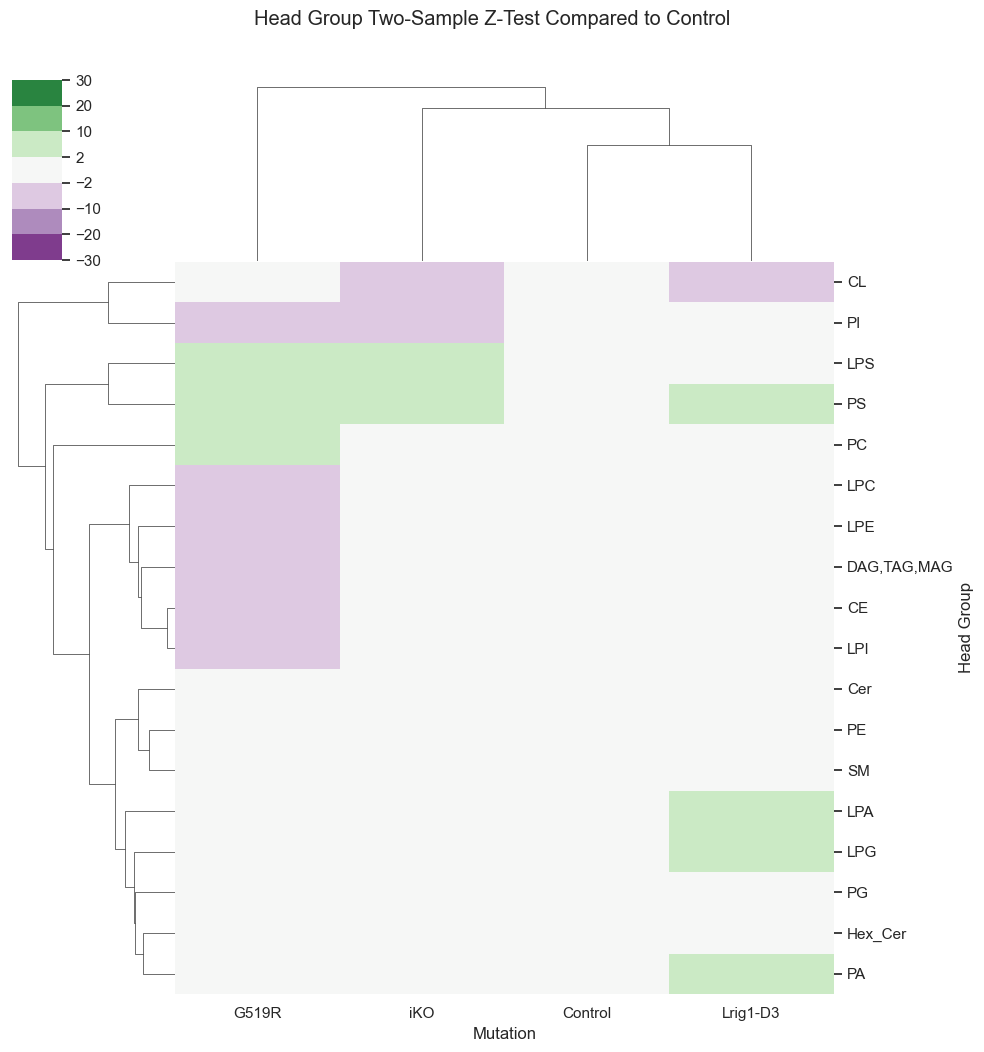

In [24]:
hg_z = functions.z_score(df_meta2,
                         df_a1,
                         var = 'Head Group 2',
                         renamed_var='Head Group',
                         ctrl = 'Control',
                         row_cluster=True,
                         outlier=False)

In [25]:
hg_z.to_csv('graphs/dgat/head_group/Z-ScoreTable.csv')
hg_z

Mutation,Control,G519R,Lrig1-D3,iKO
Head Group,,,,
CE,0.0,-3.266281,0.492321,-0.442785
CL,0.0,-1.371883,-2.632593,-5.527975
Cer,0.0,0.617374,-0.200926,1.580800
"DAG,TAG,MAG",0.0,-2.210155,-0.512348,-0.679954
Hex_Cer,0.0,-0.263162,0.890696,-0.372797
LPA,0.0,0.288899,3.301072,1.731000
LPC,0.0,-4.630092,0.995109,-1.138727
LPE,0.0,-2.128006,0.866954,-1.718839
LPG,0.0,-1.252178,2.707454,0.593674


# Chain Length Analysis

In [26]:
# long form of dataset for histogram w/ error bars
ptnstd = functions.norm_long(df_meta2, df_a1, 'Acyl Chain Length')
# ptnstd.head()

In [27]:
# groupby table for bimodal gaussian
ptns = functions.groupby_norm(df_meta2, df_a1, 'Acyl Chain Length', norm_var=False).reset_index()
# ptns.head()

## Histogram w/ Gaussian

In [28]:
from scipy.optimize import curve_fit 

### Side by Side

#### Gaussian

In [29]:
chart_list = []
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

for protein in ptnstd['Mutation'].unique():
    source = ptnstd[ptnstd['Mutation'] == protein]
    
    # create error bars
    err = alt.Chart(source).mark_errorbar(extent='stdev').encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
    )
    
    # create histogram
    bar = alt.Chart(source).mark_bar().encode(
        x='Acyl Chain Length:Q',
        y=alt.Y('mean(Fraction):Q').scale(domain=[0,0.7])
    ).properties(title={'text': protein})
    
    # create gaussian
    x = ptns['Acyl Chain Length']
    y = ptns[protein].loc[x.index]
    
    # expected vals
    n = sum(y)                         
    mean = sum(x*y)/n                  
    sigma = sum(y*(x-mean)**2)/n 
    
    expected = [0.45, mean, sigma]
    # print(protein, expected)
    
    popt,pcov = curve_fit(gauss,x,y,p0=expected)
    
    xx = np.linspace(10, 75, 500)
    
    s = pd.DataFrame({'Acyl Chain Length':xx, 'y':gauss(xx, *popt)})
    
    gaus = alt.Chart(s).mark_line(color='red', opacity=0.5).encode(
        x='Acyl Chain Length:Q',
        y=alt.Y('y:Q')
    )
    
    text1 = alt.Chart({'values':[{}]}).mark_text(
        align="left", baseline="top"
    ).encode(
        x=alt.value(5),  # pixels from left
        y=alt.value(5),  # pixels from top
        text=alt.value([f"mu: {popt[0]:.3f}", f"sigma: {popt[1]:.3f}", f"a: {popt[2]:.3f}"])
    )
    
    # append to chart list
    chart = bar + err + gaus + text1
    
    chart_list.append(chart)
    
ss_bimodal = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:])
ss_bimodal.save('graphs/dgat/chain_length/Histogram_SidebySide.png', ppi=300)
ss_bimodal

alt.VConcatChart(...)

#### Bimodal Gaussian

In [30]:
chart_list = []
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

for protein in ptnstd['Mutation'].unique():
    source = ptnstd[ptnstd['Mutation'] == protein]
    
    # create error bars
    err = alt.Chart(source).mark_errorbar(extent='stdev').encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
    )
    
    # create histogram
    bar = alt.Chart(source).mark_bar().encode(
        x='Acyl Chain Length:Q',
        y=alt.Y('mean(Fraction):Q').scale(domain=[0,.9]),
    ).properties(title=protein)
    
    # create gaussian
    x = ptns[(ptns['Acyl Chain Length'] % 2 == 0)]['Acyl Chain Length']
    y = ptns[protein].loc[x.index]
    
    # expected vals
    x1 = x[(x <= 20)]
    y1 = ptns[protein].loc[x1.index]
    x2 = x[(x >= 50) & (x <= 60)]
    y2 = ptns[protein].loc[x2.index]
    
    n1 = sum(y1)
    mean1 = sum(x1*y1)/n1                  
    sigma1 = sum(y1*(x1-mean1)**2)/n1
    a1 = max(y1)
    
    n2 = sum(y2)                         
    mean2 = sum(x2*y2)/n2                  
    sigma2 = sum(y2*(x2-mean2)**2)/n2
    a2=max(y2)
    
    expected = [mean1, sigma1, a1, mean2, sigma2, a2]
    # print(protein, expected)
    
    popt,pcov = curve_fit(bimodal,x,y,p0=expected)
    
    xx = np.linspace(10, 75, 500)
    
    s = pd.DataFrame({'Acyl Chain Length':xx, 'y':bimodal(xx, *popt)})
    
    gaus = alt.Chart(s).mark_line(color='red', opacity=0.5).encode(
        x='Acyl Chain Length:Q',
        y='y:Q'
    )
    
    text1 = alt.Chart({'values':[{}]}).mark_text(
        align="left", baseline="top"
    ).encode(
        x=alt.value(5),  # pixels from left
        y=alt.value(5),  # pixels from top
        text=alt.value([f"mu1: {popt[0]:.3f}", f"sigma1: {popt[1]:.3f}", f"a1: {popt[2]:.3f}"])
    )
    
    text2 = alt.Chart({'values':[{}]}).mark_text(
        align="left", baseline="top"
    ).encode(
        x=alt.value(230),  # pixels from left
        y=alt.value(5),  # pixels from top
        text=alt.value([f"mu2: {popt[3]:.3f}", f"sigma2: {popt[4]:.3f}", f"a2: {popt[5]:.3f}"])
    )
    
    # append to chart list
    chart = bar + err + gaus + text1 + text2
    
    chart_list.append(chart)
    
ss_bimodal = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:])
ss_bimodal.save('graphs/dgat/chain_length/BimodalHistogram_SidebySide.png', ppi=300)
ss_bimodal

alt.VConcatChart(...)

### Overlapping

#### Single Gaussian

In [31]:
chart_list_o = []
line_chart_only = []
# list of colors + counter to move to next color
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
i=0
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

for protein in ptnstd['Mutation'].unique():
    source = ptnstd[ptnstd['Mutation'] == protein]
    
    # create error bars
    err = alt.Chart(source).mark_errorbar(extent='stdev', opacity=0.3).encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
        color=alt.Color('Mutation:N').scale(range=colors)
    )
    
    # create histogram
    bar = alt.Chart(source).mark_bar(opacity=0.3).encode(
        x='Acyl Chain Length:Q',
        y=alt.Y('mean(Fraction):Q').scale(domain=[0,0.9]),
        color=alt.Color('Mutation:N').scale(range=colors)
    )
    
    # create gaussian
    x = ptns[(ptns['Acyl Chain Length'] % 2 == 0)]['Acyl Chain Length']
    y = ptns[protein].loc[x.index]
    
    # expected vals
    n = sum(y)                         
    mean = sum(x*y)/n                  
    sigma = sum(y*(x-mean)**2)/n 
    
    expected = [0.45, mean, sigma]
    # print(protein, expected)
    
    popt,pcov = curve_fit(gauss,x,y,p0=expected)
    
    xx = np.linspace(10, 75, 500)
    
    s = pd.DataFrame({'Acyl Chain Length':xx, 'Fraction':gauss(xx, *popt), 'Mutation':([protein]*len(xx))})
    
    gaus = alt.Chart(s).mark_line(color=colors[i]).encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
        color=alt.Color('Mutation:N').scale(range=colors)
    )
    
    # append to chart list
    chart = bar + err + gaus
    chart_list_o.append(chart)
    line_chart_only.append(gaus)
    
    
    # use next color in colors list
    i += 1

In [32]:
o_bimodal = alt.layer(*chart_list_o[:]).properties(title={'text':'Chain Length Distribution'},
                                                   width=400, height=400)
o_bimodal.save('graphs/dgat/chain_length/Histogram_Overlap.png', ppi=300)
o_bimodal

alt.LayerChart(...)

In [33]:
l_bimodal = alt.layer(*line_chart_only[:]).properties(title='Chain Length Distribution', width=400, height=400)
l_bimodal.save('graphs/dgat/chain_length/GaussianCurve_Overlap.png', ppi=300)
l_bimodal

alt.LayerChart(...)

#### Bimodal Gaussian

In [34]:
chart_list_o = []
line_chart_only = []
# list of colors + counter to move to next color
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
i=0
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

for protein in ptnstd['Mutation'].unique():
    source = ptnstd[ptnstd['Mutation'] == protein]
    
    # create error bars
    err = alt.Chart(source).mark_errorbar(extent='stdev', opacity=0.3).encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
        color=alt.Color('Mutation:N').scale(range=colors)
    )
    
    # create histogram
    bar = alt.Chart(source).mark_bar(opacity=0.3).encode(
        x='Acyl Chain Length:Q',
        y=alt.Y('mean(Fraction):Q').scale(domain=[0,0.9]),
        color=alt.Color('Mutation:N').scale(range=colors)
    )
    
    # create gaussian
    x = ptns[(ptns['Acyl Chain Length'] % 2 == 0)]['Acyl Chain Length']
    y = ptns[protein].loc[x.index]
    
    # expected vals
    x1 = x[(x <= 20)]
    y1 = ptns[protein].loc[x1.index]
    x2 = x[(x >= 50) & (x <= 60)]
    y2 = ptns[protein].loc[x2.index]
    
    n1 = sum(y1)
    mean1 = sum(x1*y1)/n1                  
    sigma1 = sum(y1*(x1-mean1)**2)/n1
    a1 = max(y1)
    
    n2 = sum(y2)                         
    mean2 = sum(x2*y2)/n2                  
    sigma2 = sum(y2*(x2-mean2)**2)/n2
    a2=max(y2)
    
    expected = [mean1, sigma1, a1, mean2, sigma2, a2]
    # print(protein, expected)
    
    popt,pcov = curve_fit(bimodal,x,y,p0=expected)
    
    xx = np.linspace(10, 75, 500)
    
    s = pd.DataFrame({'Acyl Chain Length':xx, 'Fraction':bimodal(xx, *popt), 'Mutation':([protein]*len(xx))})
    
    gaus = alt.Chart(s).mark_line(color=colors[i]).encode(
        x='Acyl Chain Length:Q',
        y='Fraction:Q',
        color=alt.Color('Mutation:N').scale(range=colors)
    )
    
    # append to chart list
    chart = bar + err + gaus
    chart_list_o.append(chart)
    line_chart_only.append(gaus)
    
    
    # use next color in colors list
    i += 1

In [35]:
o_bimodal = alt.layer(*chart_list_o[:]).properties(title='Chain Length Distribution', width=400, height=400)
o_bimodal.save('graphs/dgat/chain_length/BimodalHistogram_Overlap.png', ppi=300, engine='vl-convert')
o_bimodal

alt.LayerChart(...)

In [36]:
l_bimodal = alt.layer(*line_chart_only[:]).properties(title='Chain Length Distribution', width=400, height=400)
l_bimodal.save('graphs/dgat/chain_length/BimodalGaussianCurve_Overlap.png', ppi=300)
l_bimodal

alt.LayerChart(...)

## Heatmap

In [37]:
source = ptnstd[ptnstd['Acyl Chain Length'] % 2 == 0]
hcl = alt.Chart(source).mark_rect(stroke='white').encode(
    x='Mutation:N',
    y=alt.Y('Acyl Chain Length:O'),
    color='mean(Fraction):Q',
    tooltip=['Mutation', 'Acyl Chain Length', 'mean(Fraction)']
).properties(
    title = "Acyl Chain Length Distribution",
    width=500,
    height=500
)
hcl.save('graphs/dgat/chain_length/Heatmap_EvenCL.png')
hcl

alt.Chart(...)

## Z-Score

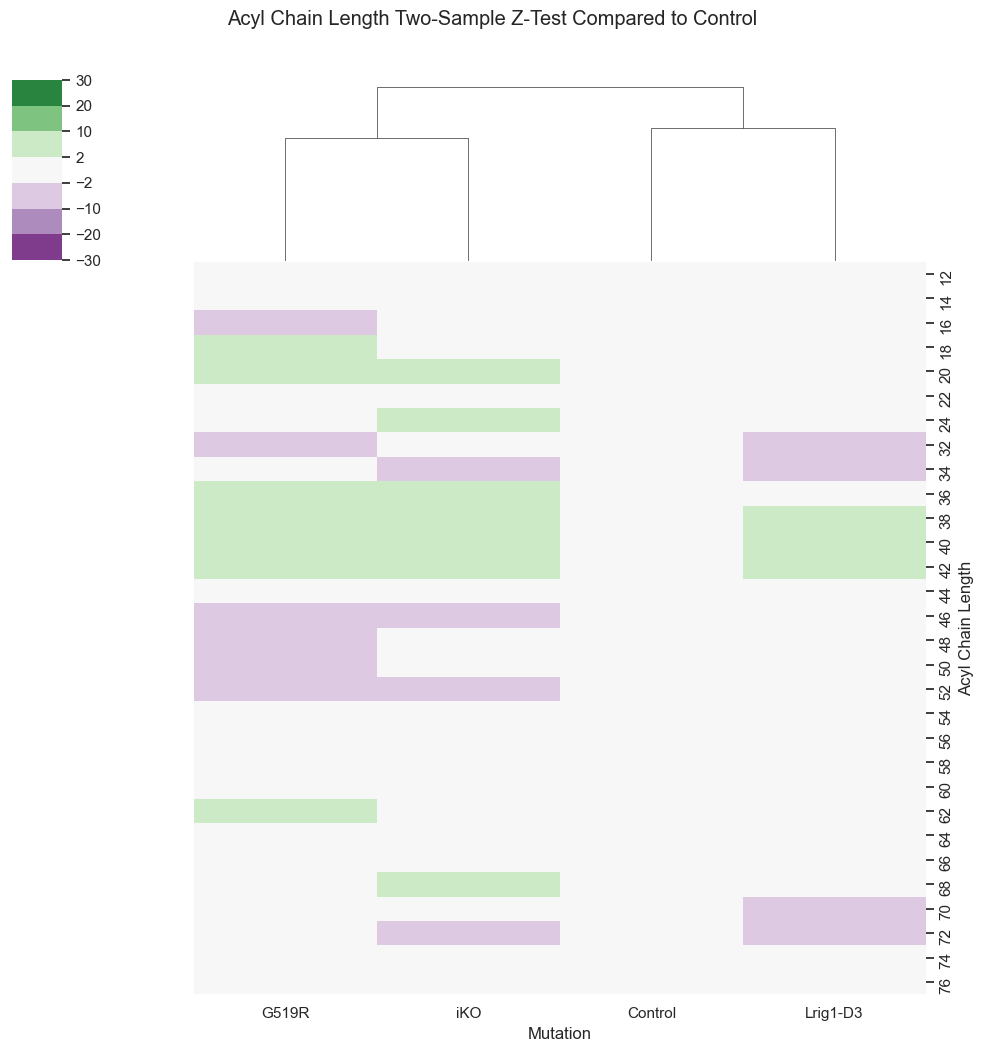

In [38]:
cl_z = functions.z_score(df_meta2,
                         df_a1,
                         var = 'Acyl Chain Length',
                         drop_var = list(range(1,70,2)),
                         ctrl = 'Control',
                         row_cluster=False,
                         outlier = False)

In [39]:
cl_z.to_csv('graphs/dgat/chain_length/Z-ScoreTable.csv')
cl_z

Mutation,Control,G519R,Lrig1-D3,iKO
Acyl Chain Length,,,,
12,0.0,-1.000000,-1.000000,0.260505
14,0.0,-1.529621,-0.413547,0.991156
16,0.0,-2.971117,-0.276197,-0.639961
18,0.0,3.810434,1.176555,1.299909
20,0.0,2.442242,1.972356,3.651701
22,0.0,-0.737615,0.282974,1.046646
24,0.0,1.744227,-0.940537,2.082853
32,0.0,-3.518551,-3.518551,-0.803661
34,0.0,-1.706726,-2.551446,-4.854285


# Unsaturation Analysis

In [40]:
u2_long = functions.norm_long(df_meta2, df_a1, var='Unsaturation 2', renamed_var= 'Unsaturation')
# u2_long.head()

## Bar Graph

In [41]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# make selection for KO protein
click = alt.selection_point(fields=['Mutation'])

# grouped bar graph
g = alt.Chart(u2_long).mark_bar().encode(
    x=alt.X('Unsaturation:O').axis(labelAngle=0),
    xOffset='Mutation:N',
    y='mean(Fraction):Q',
    color=alt.condition(click, alt.Color('Mutation:N').scale(range=colors), alt.value('lightgray')),
    tooltip=['Mutation', 'Unsaturation', 'mean(Fraction)']
).add_params(
    click
).properties(
    width=800,
    title='Unsaturation Distribution'
)

# error bars
err = alt.Chart(u2_long).mark_errorbar(extent='stdev').encode(
    x='Unsaturation:O',
    xOffset='Mutation:N',
    y='mean(Fraction):Q',
)

ub = (g + err).configure(background='white')
ub.save('graphs/dgat/unsaturation/BarGraph.png', ppi=300)
ub

alt.LayerChart(...)

In [42]:
hu = alt.Chart(u2_long).mark_rect(stroke='white').encode(
    x='Mutation:N',
    y='Unsaturation:O',
    color='mean(Fraction):Q',
    tooltip=['Mutation', 'Unsaturation', 'mean(Fraction)']
).properties(
    title='Unsaturation Distribution',
    width=400,
    height=400 
)
hu.save('graphs/dgat/unsaturation/Heatmap.png', ppi=300)
hu

alt.Chart(...)

## Z-Score

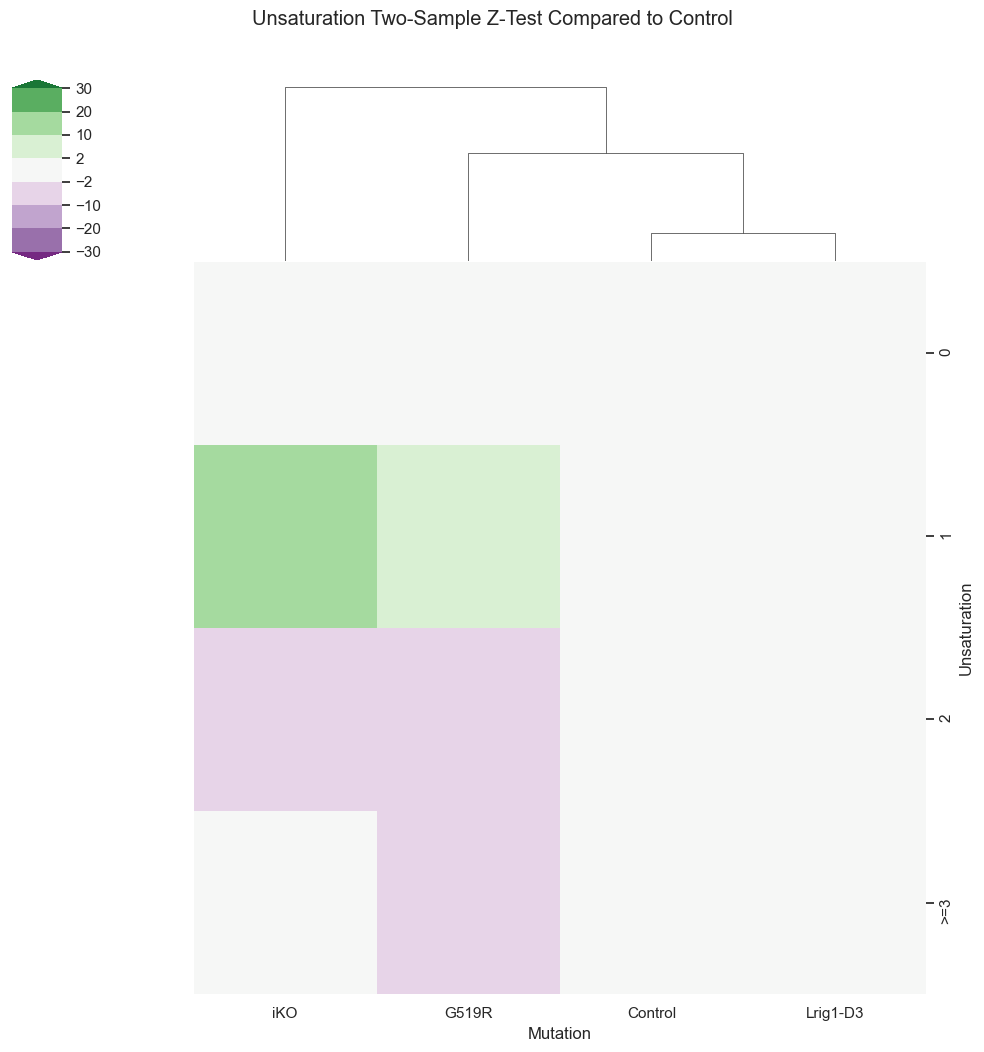

In [43]:
u_z = functions.z_score(df_meta2,
                         df_a1,
                         var = 'Unsaturation 2',
                        renamed_var = 'Unsaturation',
                         ctrl = 'Control',
                         row_cluster=False)

In [44]:
u_z.to_csv('graphs/dgat/unsaturation/Z-ScoreTable.csv')
u_z

Mutation,Control,G519R,Lrig1-D3,iKO
Unsaturation,,,,
0,0.0,-1.118687,-0.641383,-1.836501
1,0.0,4.599150,1.236492,11.560670
2,0.0,-4.543519,-0.615979,-2.499409
>=3,0.0,-2.347828,-0.592948,-0.458653
